In [1]:
!pip install evaluate transformers datasets
!pip install sacremoses


   ------ ---------------------------------  2/12 [multidict]
   ------------- --------------------------  4/12 [dill]
   ------------- --------------------------  4/12 [dill]
   ------------- --------------------------  4/12 [dill]
   ------------- --------------------------  4/12 [dill]
   ------------- --------------------------  4/12 [dill]
   ------------- --------------------------  4/12 [dill]
   ------------- --------------------------  4/12 [dill]
   -------------------- -------------------  6/12 [yarl]
   ----------------------- ----------------  7/12 [multiprocess]
   ----------------------- ----------------  7/12 [multiprocess]
   ----------------------- ----------------  7/12 [multiprocess]
   ----------------------- ----------------  7/12 [multiprocess]
   ----------------------- ----------------  7/12 [multiprocess]
   ----------------------- ----------------  7/12 [multiprocess]
   -------------------------- -------------  8/12 [aiosignal]
   --------------------------

In [2]:
# Comparative Analysis of Foundation vs Domain-Specific NLP Models

import random
import numpy as np
import torch
import matplotlib.pyplot as plt
from datasets import load_dataset
from transformers import (
    AutoTokenizer,
    AutoModelForSeq2SeqLM,
    AutoModelForMaskedLM,
    pipeline
)
from evaluate import load as load_metric

# Set up seed for reproducibility
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

set_seed()

d:\Christ\T4\LLM\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# -----------------------------
# Model Selection
# -----------------------------
foundation_model_name = "t5-large"  # Simple and well-known foundation model
domain_models = {
    "finance": ["ProsusAI/finbert"],
    "healthcare": ["emilyalsentzer/Bio_ClinicalBERT"],
    "legal": ["nlpaueb/legal-bert-base-uncased"],
    "education": ["allenai/scibert_scivocab_uncased"],
    "ecommerce": ["nlptown/bert-base-multilingual-uncased-sentiment"],
    "sports": ["t5-large"]  # Using same foundation model for simplicity
}

# Select your domain
selected_domain = "healthcare"  # Change to: finance, legal, education, ecommerce, sports

models_to_compare = [foundation_model_name] + domain_models[selected_domain]
tokenizers = {}
models = {}

for model_name in models_to_compare:
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    try:
        model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
    except:
        model = AutoModelForMaskedLM.from_pretrained(model_name)
    tokenizers[model_name] = tokenizer
    models[model_name] = model

d:\Christ\T4\LLM\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\prati\.cache\huggingface\hub\models--t5-large. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better perform

In [ ]:
# -----------------------------
# Dataset and Preprocessing
# -----------------------------
sample_texts = [
    "A patient suffering from chronic kidney disease requires dialysis every week.",
    "The medication was prescribed after evaluating the symptoms of hypertension.",
    "New research in oncology shows promising results for breast cancer treatment.",
    "The surgeon performed a minimally invasive procedure to remove the gallbladder.",
    "A new vaccine was introduced to combat the outbreak of a viral infection.",
    "The patient's blood pressure was stabilized using intravenous medication.",
    "Advances in cardiology have led to better treatment of arrhythmia.",
    "Medical staff closely monitored the recovery of the ICU patients.",
    "The use of AI in diagnostics is growing rapidly in radiology departments.",
    "Telemedicine is helping rural patients access specialized care.",
    "Proper hygiene and sanitation prevent the spread of hospital-acquired infections.",
    "Pediatricians are noticing a rise in respiratory illnesses among children."
]


def preprocess(text, tokenizer, max_length=128):
    return tokenizer(text, return_tensors="pt", padding="max_length", truncation=True, max_length=max_length)


In [16]:
# -----------------------------
# Evaluation and Results
# -----------------------------
rouge = load_metric("rouge")
bleu = load_metric("bleu")

results = {}

for model_name in models_to_compare:
    model = models[model_name].eval()
    tokenizer = tokenizers[model_name]
    print(f"\nEvaluating {model_name}...")

    generated_texts = []
    for text in sample_texts:
        inputs = preprocess(text, tokenizer)
        with torch.no_grad():
            if hasattr(model, "generate"):
                output = model.generate(**inputs)
                decoded = tokenizer.decode(output[0], skip_special_tokens=True)
            else:
                output = model(**inputs)
                token_ids = torch.argmax(output.logits, dim=-1)
                decoded = tokenizer.decode(token_ids[0], skip_special_tokens=True)
        generated_texts.append(decoded)

    # Compute BLEU and ROUGE-L
    bleu_score = bleu.compute(predictions=generated_texts,
                              references=sample_texts)
    rouge_score = rouge.compute(predictions=generated_texts, references=sample_texts)

    results[model_name] = {
        "BLEU": bleu_score["bleu"],
        "ROUGE-L": rouge_score["rougeL"] # Access rougeL directly
    }


Evaluating bert-base-uncased...

Evaluating t5-small...

Evaluating facebook/bart-base...

Evaluating google/flan-t5-small...


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Evaluating gpt2...


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Evaluating emilyalsentzer/Bio_ClinicalBERT...


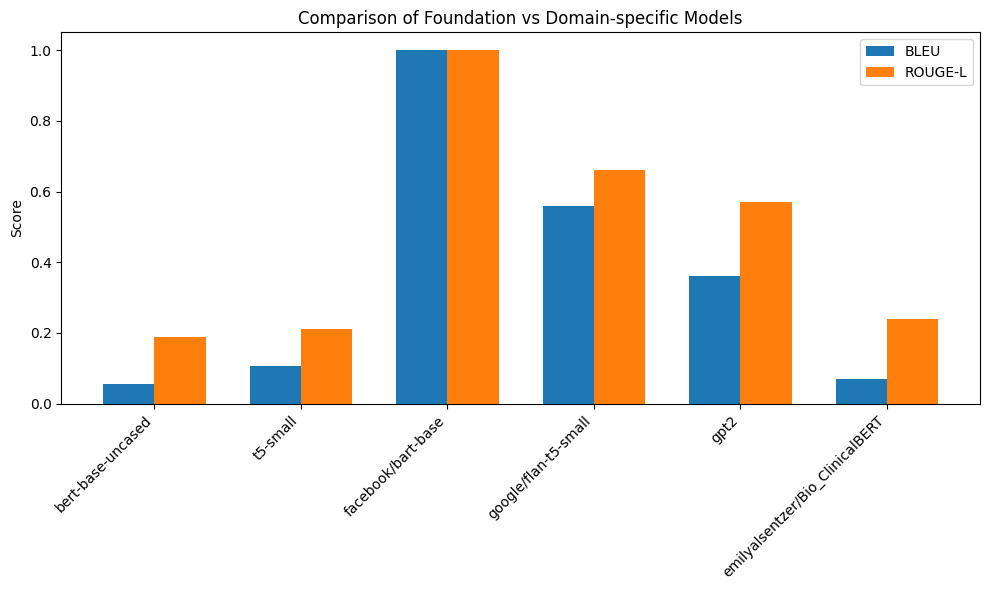

In [17]:
# -----------------------------
# Visualization
# -----------------------------
labels = list(results.keys())
bleu_scores = [results[m]["BLEU"] for m in labels]
rouge_scores = [results[m]["ROUGE-L"] for m in labels]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, bleu_scores, width, label='BLEU')
plt.bar(x + width/2, rouge_scores, width, label='ROUGE-L')

plt.ylabel('Score')
plt.title('Comparison of Foundation vs Domain-specific Models')
plt.xticks(ticks=x, labels=labels, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()



In [10]:
# -----------------------------
# Human Evaluation Criteria
# -----------------------------
print("\n--- Human Evaluation Guidelines ---")
print("1. Coherence: Does the output make logical sense?")
print("2. Relevance: Is the output focused on the original input topic?")
print("3. Factual Accuracy: Are the claims in the output factually correct?")
print("----------------------------------")



--- Human Evaluation Guidelines ---
1. Coherence: Does the output make logical sense?
2. Relevance: Is the output focused on the original input topic?
3. Factual Accuracy: Are the claims in the output factually correct?
----------------------------------
